# Project Design

A real estate investment company has initiated a data exploration project with the aim of identifying the most promising apartments for acquisition in Madrid, Spain. The project will leverage data analysis techniques to assess potential properties based on the following key factors:

* Location: Analyzing the geographical location of apartments to identify neighborhoods with high demand and growth potential.

* Occupancy Rate: Evaluating the current occupancy rates of apartments to gauge their income-generating potential.

* Rental Price: Scrutinizing rental prices to ensure the company can achieve a desirable return on investment.

* Buying Price: Assessing the purchase prices of apartments to identify cost-effective opportunities for acquisition.

Through data exploration, this project will enable the company to make informed decisions about which properties to buy, with a focus on maximizing profitability and long-term returns.

# Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy=True

#  Initial Data Analysis and Preparation

## Data Source

Real data of Madrid apartments from AirBnB was used for this case, it can be found in this website: http://insideairbnb.com/get-the-data.html

## Quick Data review

The datasets selected for this data exploration project are listings.csv and listings.csv.gz. Other files do not provide useful information for generating insights related to the established approach.

### listings

This file **listings.csv** is a summary information and metrics for listings in Madrid.

In [4]:
listings= pd.read_csv('../Data/listings.csv')

In [4]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,80,2019-05-14,1.21,2,180,4,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-05-29,0.39,2,364,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,5,222,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,12,2020-03-01,0.51,1,115,2,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2018-05-15,1.65,1,349,0,NaN


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18909 non-null  int64  
 1   name                            18906 non-null  object 
 2   host_id                         18909 non-null  int64  
 3   host_name                       18883 non-null  object 
 4   neighbourhood_group             18909 non-null  object 
 5   neighbourhood                   18909 non-null  object 
 6   latitude                        18909 non-null  float64
 7   longitude                       18909 non-null  float64
 8   room_type                       18909 non-null  object 
 9   price                           18909 non-null  int64  
 10  minimum_nights                  18909 non-null  int64  
 11  number_of_reviews               18909 non-null  int64  
 12  last_review                     

### listings detailed (listings_det)

The file **listings.csv.gz** is a detailed listings data

In [8]:
listings_det = pd.read_csv('../Data/listings.csv.gz',compression='gzip')

In [9]:
listings_det.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210910193531,2021-09-11,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,4.89,4.77,4.85,NaN,f,2,0,2,0,1.21
1,21853,https://www.airbnb.com/rooms/21853,20210910193531,2021-09-11,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.39
2,23001,https://www.airbnb.com/rooms/23001,20210910193531,2021-09-11,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,5,4,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210910193531,2021-09-11,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.51
4,26825,https://www.airbnb.com/rooms/26825,20210910193531,2021-09-11,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,4.71,4.70,4.72,NaN,f,1,0,1,0,1.65


In [10]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18909 non-null  int64  
 1   listing_url                                   18909 non-null  object 
 2   scrape_id                                     18909 non-null  int64  
 3   last_scraped                                  18909 non-null  object 
 4   name                                          18906 non-null  object 
 5   description                                   17854 non-null  object 
 6   neighborhood_overview                         10997 non-null  object 
 7   picture_url                                   18908 non-null  object 
 8   host_id                                       18909 non-null  int64  
 9   host_url                                      18909 non-null 

### Additional data

The datasets from Airbnb do not provide the purchasing price of the apartments; they only include the rental prices. However, we obtained data from an additional source: https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/

The data was extracted using the Chrome plugin 'Instant Data Scraper' and it was saved as a csv.

The external dataset displays the price per square meter per district.

In [57]:
price_m2 = pd.read_csv('../Data/idealista.csv') \
    .loc[1:,['table__cell','icon-elbow']] \
    .rename(columns = {'table__cell':'price_m2','icon-elbow':'district'})
price_m2

,price_m2,district
1,4.085 €/m2,Arganzuela
2,3.409 €/m2,Barajas
3,2.123 €/m2,Carabanchel
4,4.827 €/m2,Centro
5,5.098 €/m2,Chamartín
6,5.381 €/m2,Chamberí
7,2.940 €/m2,Ciudad Lineal
8,3.568 €/m2,Fuencarral
9,3.871 €/m2,Hortaleza
10,2.267 €/m2,Latina


Transforming 'price_m2' to an integer

In [58]:
price_m2['price_m2'] = price_m2.price_m2.str.split(expand = True)[0].str.replace('.','',regex=False).astype('int')
price_m2

,price_m2,district
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral
9,3871,Hortaleza
10,2267,Latina


# Data Cleaning 

## listings Dataset

### Variables dropping

In [18]:
to_drop = [
              'host_name',
              'number_of_reviews',
              'last_review',
              'reviews_per_month',
              'number_of_reviews_ltm',
              'license'
             ]

listings.drop(columns = to_drop, inplace=True)

listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349
...,...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358
18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358
18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358
18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358


### Variable type changing

There are three variables whose types need to be changed from 'object' to 'category'.

In [19]:
for variable in ['neighbourhood_group','neighbourhood','room_type']:
    listings[variable] = listings[variable].astype('category')

In [20]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18909 non-null  int64   
 1   name                            18906 non-null  object  
 2   host_id                         18909 non-null  int64   
 3   neighbourhood_group             18909 non-null  category
 4   neighbourhood                   18909 non-null  category
 5   latitude                        18909 non-null  float64 
 6   longitude                       18909 non-null  float64 
 7   room_type                       18909 non-null  category
 8   price                           18909 non-null  int64   
 9   minimum_nights                  18909 non-null  int64   
 10  calculated_host_listings_count  18909 non-null  int64   
 11  availability_365                18909 non-null  int64   
dtypes: category(3), fl

### Nulls

There are only 3 null records, and they don't affect the analysis.

In [21]:
listings[listings.name.isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
1538,7164589,NaN,37525983,Centro,Palacio,40.41458,-3.71422,Private room,30,1,1,0
2394,11687495,NaN,48387429,San Blas - Canillejas,Simancas,40.43765,-3.62672,Entire home/apt,50,1,1,0
2842,13585476,NaN,20922102,Centro,Universidad,40.42718,-3.71144,Entire home/apt,65,3,1,0


### Duplicates

There is no duplicates

In [23]:
listings.duplicated().sum()

0

### Categoricals analysis

In [24]:
listings.neighbourhood_group.value_counts()

Centro                   8433
Salamanca                1267
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    656
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: neighbourhood_group, dtype: int64

In [25]:
listings.neighbourhood.value_counts()

Embajadores    2255
Universidad    1772
Palacio        1533
Sol            1126
Justicia        910
               ... 
El Plantío        5
Valdemarín        4
El Pardo          3
Horcajo           2
Atalaya           1
Name: neighbourhood, Length: 128, dtype: int64

In [26]:
listings.room_type.value_counts()

Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           163
Name: room_type, dtype: int64

* The 'listings.room_type' variable includes hotel, but since the project focuses exclusively on apartments, this data will be excluded.

In [27]:
listings = listings.loc[listings.room_type != 'Hotel room']

In [28]:
listings.room_type.value_counts()

Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room             0
Name: room_type, dtype: int64

### Numerical variables analysis

In [30]:
listings.iloc[:,8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,18746.0,129.271365,432.384680,8.0,36.0,64.0,105.0,9999.0
minimum_nights,18746.0,7.295850,35.430022,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,18746.0,10.731676,26.429455,1.0,1.0,2.0,6.0,194.0
availability_365,18746.0,153.761656,140.363063,0.0,0.0,113.0,310.0,365.0


* **Analyzing the maximum and minimum values of the 'price' variable.**

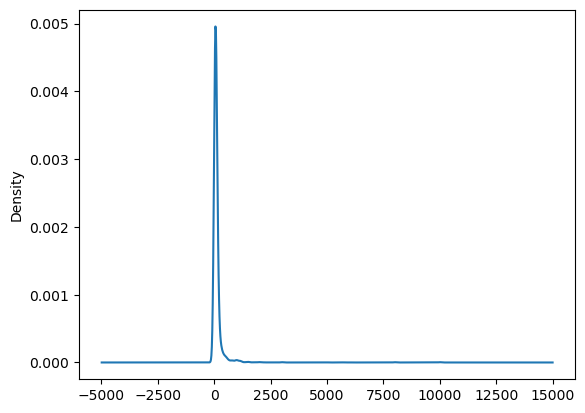

In [32]:
listings.price.plot.kde();

* **Analyzing the maximum values.**

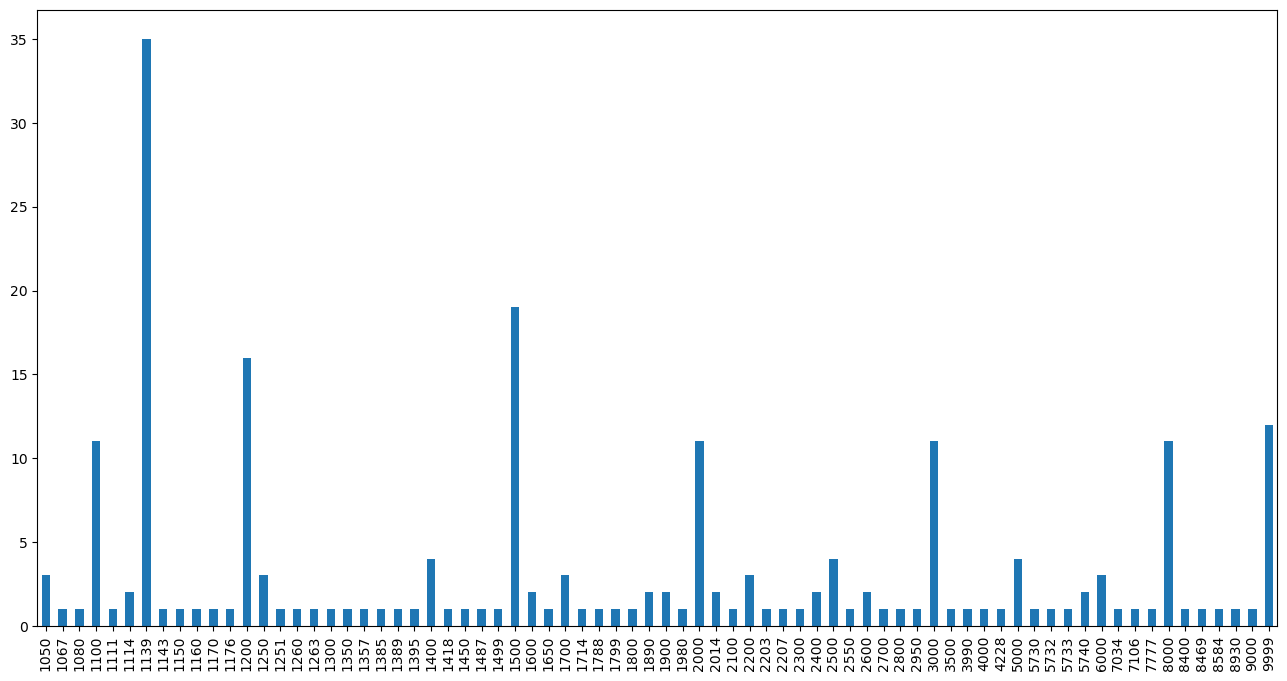

In [34]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price > 1000].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

* There are some '9999' values, which used to be used to represent null values. However, as they have the same frequency as certain values like '8000,' they may be genuine data points, and there is no need to discard them.

* **Analyzing values close to zero in price variable**

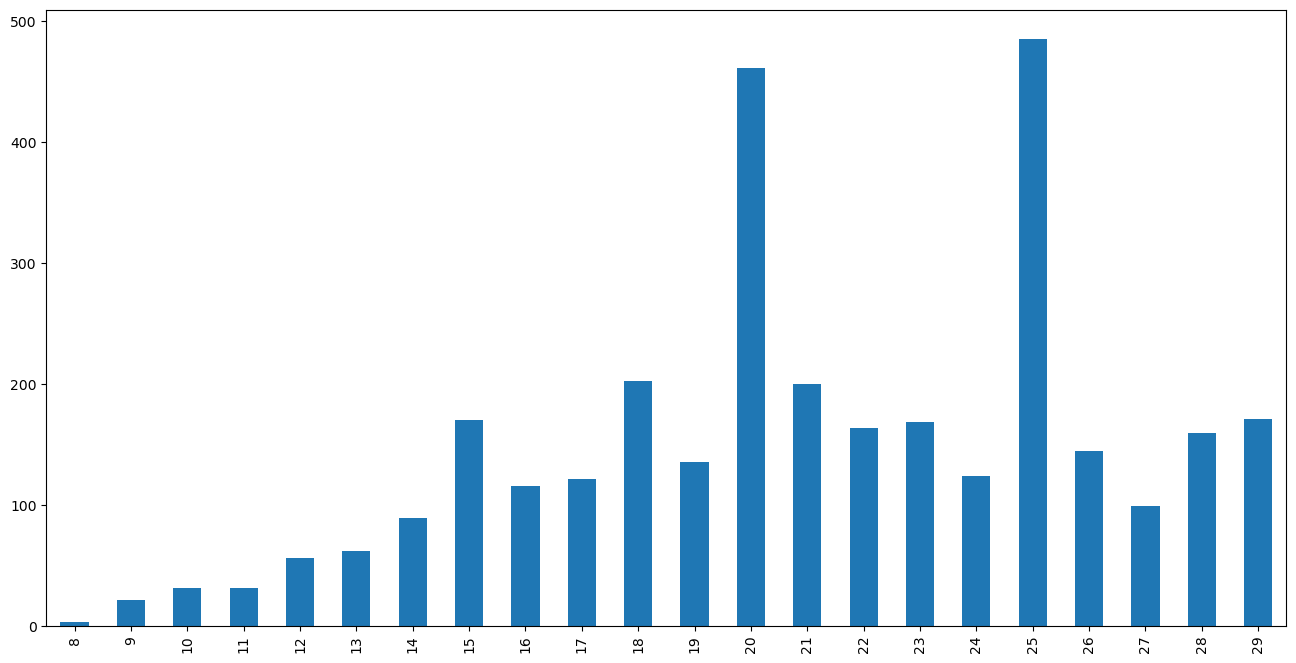

In [35]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

* There is a peak in the plot at 20 euros. It would be challenging to generate profits below this price. Therefore, those records will be discarded.

In [36]:
listings = listings.loc[listings.price > 19]
listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349
...,...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358
18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358
18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358
18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358


## listings_det Dataset

### Dataset modification

Selecting just the variables that provide pertinent information to the project approach.

In [37]:
a_incluir = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location'
             ]

listings_det = listings_det.loc[:,a_incluir]

listings_det

,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,Excellent connection with the AIRPORT and EXHI...,t,2,NaN,1.0,1.0,80,4.87,4.89,4.77
1,21853,We have a quiet and sunny room with a good vie...,f,1,NaN,1.0,1.0,33,4.58,4.82,4.21
2,23001,"Apartamento de tres dormitorios dobles, gran s...",f,6,NaN,3.0,5.0,0,NaN,NaN,NaN
3,24805,"Studio located 50 meters from Gran Via, next t...",f,3,NaN,NaN,1.0,12,4.92,5.00,5.00
4,26825,Nice and cozy roon for one person with a priva...,f,1,NaN,1.0,1.0,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN
18905,52182273,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN
18906,52182303,ROOM <br /> <br />cozy room in madrid centro i...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN
18907,52182321,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN


### Changing variable types

In [38]:
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')
    
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     17475 non-null  float64 
 6   beds                         18568 non-null  float64 
 7   number_of_reviews            18909 non-null  int64   
 8   review_scores_rating         13877 non-null  float64 
 9   review_scores_communication  13640 non-null  float64 
 10  review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 1.5+ MB


### Nulls Checking

In [39]:
listings_det.isna().sum()

id                                 0
description                     1055
host_is_superhost                 26
accommodates                       0
bathrooms                      18909
bedrooms                        1434
beds                             341
number_of_reviews                  0
review_scores_rating            5032
review_scores_communication     5269
review_scores_location          5272
dtype: int64

Findings:

* 'bathrooms' has no values; therefore, the variable will be discarded.

* 'description' is not important, so the variable will be kept intact.

* 'host_is_superhost' is not relevant to the project, so it will remain in the dataset.

* 'beds' can be imputed using 'accommodates'.

* 'bedrooms' is a relevant variable, so null values can be imputed through proxies like 'accommodates' or 'beds'.


### Dropping Variables

In [51]:
listings_det.drop(columns = 'bathrooms', inplace = True)
listings_det

,id,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77
1,21853,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
2,23001,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN
3,24805,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00
4,26825,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...
18904,52182264,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,1.0,0.0,0,NaN,NaN,NaN
18905,52182273,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,1.0,0.0,0,NaN,NaN,NaN
18906,52182303,ROOM <br /> <br />cozy room in madrid centro i...,f,1,1.0,0.0,0,NaN,NaN,NaN
18907,52182321,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,1.0,0.0,0,NaN,NaN,NaN


### Imputation of Null Values

* **Using a crosstab to see if there is a correlation between beds and accommodates**

In [40]:
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.0,222,259,41,68,15,12,5,3,0,2,0,0,0,0,0,1
1.0,2765,4911,399,639,14,9,0,3,0,2,0,0,0,0,0,9
2.0,120,1110,1016,2277,125,148,3,3,0,1,0,0,1,0,0,1
3.0,18,75,231,925,395,582,18,26,1,1,0,0,0,0,0,0
4.0,20,28,32,216,214,498,73,92,3,9,0,1,0,0,0,0
5.0,2,5,6,20,42,178,75,94,9,30,2,2,0,1,0,0
6.0,14,9,2,5,7,62,21,61,9,18,4,8,2,0,0,0
7.0,0,1,0,2,2,6,10,19,8,17,2,6,1,4,0,0
8.0,3,2,0,0,3,2,0,21,3,18,2,9,2,2,1,0


Findings:

* For 1 or 2 guests, 1 bed is required.
* For 3 or 4 guests, 2 beds are required.
* For 5 or 6 guests, 3 beds are required.
* For more than 6 guests, 4 beds are required.

* **Defining a function that imputes 'beds' values using 'accommodates' variable.**

In [41]:
def nan_imputing(row):
    #List of conditions
    conditions = [(row.accommodates <= 2),
               (row.accommodates > 2) & (row.accommodates <= 4),
               (row.accommodates > 4) & (row.accommodates <= 6),
               (row.accommodates > 6)]

    #List de results
    results = [1,2,3,4]
    
    #Output
    return(np.select(conditions,results, default = -999))

#Imputation
listings_det.loc[listings_det.beds.isna(),'beds'] = listings_det.loc[listings_det.beds.isna()].apply(nan_imputing, axis = 1).astype('float64')


In [42]:
listings_det.beds.value_counts(dropna = False)

1.0     9061
2.0     4828
3.0     2276
4.0     1190
0.0      628
5.0      466
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: beds, dtype: int64

* The correlation between 'bedrooms' and 'accommodates' is not clear. But there is a defined correlation between bedrooms and beds

In [43]:
pd.crosstab(listings_det.bedrooms, listings_det.beds, dropna=False)

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,23.0,24.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,451,8038,3039,459,139,15,36,1,13,1,...,0,1,0,1,0,0,0,0,0,0
2.0,65,108,1372,1329,532,110,33,7,5,0,...,0,0,0,0,0,0,0,1,0,0
3.0,7,28,22,414,393,242,80,25,11,7,...,2,0,0,0,0,0,0,0,0,0
4.0,6,23,3,7,95,63,56,27,19,6,...,2,2,0,0,0,0,0,0,0,0
5.0,1,14,0,0,2,26,10,16,17,2,...,1,1,2,1,0,2,0,1,0,0
6.0,2,4,0,0,0,0,6,0,2,3,...,0,1,1,0,0,1,1,0,0,0
7.0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,3,1,1,1,0,0,0
8.0,0,3,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Findings:
* there are 0, 1, or 2 beds in 1 bedroom.
* there are 3 or 4 beds in 2 bedrooms.
* there are 5 or 6 beds in 3 bedrooms.
* the remaining beds could be accommodated in 4 bedrooms.

In [44]:
listings_det.bedrooms.value_counts(dropna = False)

1.0     12212
2.0      3562
NaN      1434
3.0      1233
4.0       311
5.0       105
6.0        24
7.0        11
8.0         7
9.0         3
10.0        3
14.0        2
15.0        1
18.0        1
Name: bedrooms, dtype: int64

**Using the 'nan_imputing' function**

In [49]:
def nan_imputing(row):
    #List of conditions
    conditions = [(row.beds <= 2),
               (row.beds > 2) & (row.beds <= 4),
               (row.beds > 4) & (row.beds <= 6),
               (row.beds > 6)]

    #List de results
    results = [1,2,3,4]
    
    #Output
    return(np.select(conditions,results, default = -999))

#Imputation
listings_det.loc[listings_det.bedrooms.isna(),'bedrooms'] = listings_det.loc[listings_det.bedrooms.isna()].apply(nan_imputing, axis = 1).astype('float64')


In [50]:
listings_det.bedrooms.value_counts(dropna = False)

1.0     13540
2.0      3657
3.0      1244
4.0       311
5.0       105
6.0        24
7.0        11
8.0         7
9.0         3
10.0        3
14.0        2
15.0        1
18.0        1
Name: bedrooms, dtype: int64

### Duplicates

In [52]:
listings_det.duplicated().sum()

0

### Categoricals analysis

In [53]:
listings_det.host_is_superhost.value_counts()

f    15423
t     3460
Name: host_is_superhost, dtype: int64

### Numerical variables analysis

In [54]:
listings_det.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
id,18909.0,3.055841e+07,1.448889e+07,6369.0,19305558.00,33537761.00,42555334.00,52182334.0
accommodates,18909.0,3.094928e+00,1.963715e+00,0.0,2.00,2.00,4.00,16.0
bedrooms,18909.0,1.414670e+00,8.116969e-01,1.0,1.00,1.00,2.00,18.0
beds,18909.0,1.909197e+00,1.444317e+00,0.0,1.00,1.00,2.00,24.0
number_of_reviews,18909.0,3.270612e+01,6.524996e+01,0.0,0.00,5.00,32.00,744.0
review_scores_rating,13877.0,4.549404e+00,7.834379e-01,0.0,4.50,4.75,4.94,5.0
review_scores_communication,13640.0,4.776612e+00,4.632929e-01,1.0,4.75,4.92,5.00,5.0
review_scores_location,13637.0,4.788151e+00,3.774844e-01,1.0,4.73,4.92,5.00,5.0


Everything related to numerical variables look coherent.

# Dataframe Creation

## Merging datasets

There are two datasets:

* 'listings'
* 'listings_det'

Both datasets will be joined using the 'merge()' function, with the 'listings' dataset as the primary dataset, using the 'id' column as the common key.

In [59]:
df = pd.merge(left = listings, right = listings_det, how = 'left', on = 'id')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,...,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,...,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,...,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,...,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,...,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,...,358,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,1.0,0.0,0,NaN,NaN,NaN
17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,...,358,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,1.0,0.0,0,NaN,NaN,NaN
17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,...,358,ROOM <br /> <br />cozy room in madrid centro i...,f,1,1.0,0.0,0,NaN,NaN,NaN
17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,...,358,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,1.0,0.0,0,NaN,NaN,NaN


## Adding 'price_m2' to the dataframe

It is neccesary to rename some values in order to make the match of both columns (listings.neighbourhood_group, price_m2.district) 

In [60]:
price_m2.district = price_m2.district.map({'Fuencarral':'Fuencarral - El Pardo',
                        'Moncloa':'Moncloa - Aravaca',
                        'San Blas':'San Blas - Canillejas'}) \
                    .fillna(price_m2.district)

price_m2

,price_m2,district
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral - El Pardo
9,3871,Hortaleza
10,2267,Latina


**Merging df with 'price_m2'**

In [61]:
df = pd.merge(left = df, right = price_m2, how = 'left', left_on='neighbourhood_group', right_on='district')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,...,f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,...,f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,6114,Salamanca


# Saving Dataframe

In [65]:
df.to_csv('../Data/Apartment_rental_df.csv')